# Linear Regression
## Problem

Data values $d_i\pm \sigma_i$ are given at the positions $x_i$ $(i=1 .. N)$. The problem is to find the parameters of the linear model $$\fbox{f=a x +b}$$ that is the "best" or "optimal" representation of the data. Thereby we shall account for the uncertainty/error of the individual data points.

The error  $e_i$ for the single data points $d_i$ is given through the difference to the model line

$$e_i=f_i-d_i$$

We have an overdetermined equation system with two unknown parameters $a$ and $b$ and $N>2$ known values.

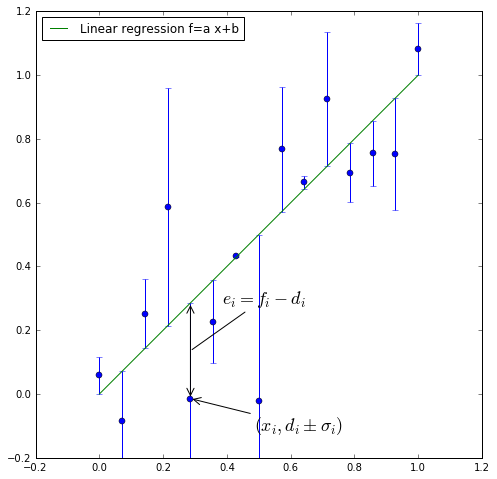

In [13]:
Fig1()

## Least-Squares Method

The goodness of the fit is given through the sum of the squared differences, the error function $F$

$$
F(a,b)=\sum_{i=1}^{N} \frac{e_i^2}{\sigma_i^2}
$$

### Goal

The problem is to find the special parameters $\hat{a},\hat{b}$ for the minimum of $F(\hat{a},\hat{b})$ 

### Method

Conditions for the minimum of $F$:
$$
\frac{\partial F}{\partial a}=0
$$

$$
\frac{\partial F}{\partial b}=0
$$

with

$$
F(a,b)=\sum_{i=1}^{N} \frac{e_i^2}{\sigma_i^2}=\sum_{i=1}^{N} \frac{(ax_i+b-d_i)^2 }{\sigma_i^2}\\
=\sum_{i=1}^{N} \frac{1}{\sigma_i^2} ( a^2 x_i^2 + 2 a b x_i - 2 a d_i x_i + b^2 - 2 b d_i + d_i^2 )
$$

## Solution for the optimal fit

The solution for the parameters of the optimal linear model $f=\hat{a} x + \hat{b}$ follows from the derivatives

$$
\frac{\partial F}{\partial a}=0=\underbrace{(\sum_{i=1}^{N} \frac{x_i^2 }{\sigma_i^2})}_{\alpha} \hat{a} + \underbrace{(\sum_{i=1}^{N} \frac{x_i }{\sigma_i^2})}_{\beta} \hat{b} - \underbrace{(\sum_{i=1}^{N} \frac{x_i d_i }{\sigma_i^2})}_{\gamma}  
$$


$$
\frac{\partial F}{\partial b}=0=(\sum_{i=1}^{N} \frac{x_i }{\sigma_i^2}) \hat{a} + (\sum_{i=1}^{N} \frac{1 }{\sigma_i^2}) \hat{b} - (\sum_{i=1}^{N} \frac{d_i }{\sigma_i^2})
$$

We simplify with  $\alpha=\sum \frac{x_i^2 }{\sigma_i^2}$, $\beta=\sum \frac{x_i }{\sigma_i^2}$, $\gamma=\sum \frac{x_i d_i }{\sigma_i^2}$, $\delta=\sum \frac{d_i }{\sigma_i^2}$ und $\epsilon=\sum \frac{1 }{\sigma_i^2}$

it follows

$$
\alpha \hat{a}  + \beta \hat{b} = \gamma
$$


$$
\beta \hat{a}  + \epsilon \hat{b} = \delta
$$

Finally we solve for $\hat{a}$ und $\hat{b}$


$$
\hat{b} = \frac{ \alpha \delta - \beta \gamma }{ \alpha \epsilon - \beta^2 }
$$

$$
\hat{a} = \frac{  \gamma - \beta \hat{b} }{ \alpha } 
$$




# Symbolic calculations using Python

The SymPy modul allows to perform symbolic calculations similar like Maple or with the symbolic toolbox of Matlab

 * http://sympy.org/

In the following we calculate derivates to verify the solutions given above

In [14]:
import sympy as sp
a,b,x_i,d_i,s_o=sp.symbols("a b x_i d_i s_i")
sp.init_printing() # For latex view

In [15]:
F=(a*x_i+b-d_i)**2
F

In [16]:
sp.expand(F)

In [4]:
sp.diff(F,a)

In [9]:
sp.expand(sp.diff(F,a))/2

In [17]:
sp.diff(F,b)/2

Compare results with $\frac{\partial F}{\partial a}$ and $\frac{\partial F}{\partial b}$ given above.


# Attachment: code for figures

In [18]:
%pylab inline
# In the following code we use xn instead of x
# in order to distinguish between symbolic variables and numerical arrays
def Fig1():
    N=15 # Number of data points
    i=4 # Index of example 
    xn=linspace(0,1,N) # Generate N-data points between 0 and 1
    an,bn=1.0,0.0 # Model parameters
    ye=randn(N)*0.2 # True error
    ye[i]=-0.3 # 
    dn=an*xn+bn+ye #True relation + error

    figure(figsize=[8,8])  
    errorbar(xn,dn,yerr=ye,fmt='o')
    plot(xn,an*xn+bn,'g-',label='Linear regression f=a x+b')
    annotate('$(x_i,d_i\pm \sigma_i)$',xy=(xn[i], dn[i]), arrowprops=dict(arrowstyle='->'), xytext=(xn[i]+0.2, dn[i]-0.1),fontsize=18)
    annotate('',xy=(xn[i], dn[i]), arrowprops=dict(arrowstyle='<->'), xytext=(xn[i], xn[i]*an+bn),fontsize=18)
    annotate('$e_i=f_i-d_i$',xy=(xn[i], xn[i]*an+bn+ye[i]/2.0) , arrowprops=dict(arrowstyle='-'), xytext=(xn[i]+0.1, dn[i]+0.3),fontsize=18)
    axis([-0.2,1.2,-0.2,1.2])
    legend(loc=2)

Populating the interactive namespace from numpy and matplotlib
